In [1]:
!git clone https://github.com/hungvotranchi/ComputerVision.git

Cloning into 'ComputerVision'...
remote: Enumerating objects: 181, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 181 (delta 69), reused 161 (delta 52), pack-reused 0
Receiving objects: 100% (181/181), 5.52 MiB | 28.71 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [2]:
import os
os.chdir("ComputerVision/ImageClassification")
!sh scripts/download.sh
os.chdir("model")

--2024-03-12 06:56:07--  https://www.robots.ox.ac.uk/~vgg/data/fgvc-aircraft/archives/fgvc-aircraft-2013b.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2753340328 (2.6G) [application/x-gzip]
Saving to: 'fgvc-aircraft-2013b.tar.gz'

fgvc-aircraft-2013b 100%[===================>]   2.56G  29.1MB/s    in 91s     

2024-03-12 06:57:39 (28.9 MB/s) - 'fgvc-aircraft-2013b.tar.gz' saved [2753340328/2753340328]

fgvc-aircraft-2013b/
fgvc-aircraft-2013b/vl_tpfp.m
fgvc-aircraft-2013b/README.md
fgvc-aircraft-2013b/example_evaluation.m
fgvc-aircraft-2013b/README.html
fgvc-aircraft-2013b/vl_roc.m
fgvc-aircraft-2013b/vl_pr.m
fgvc-aircraft-2013b/vl_argparse.m
fgvc-aircraft-2013b/evaluation.m
fgvc-aircraft-2013b/data/
fgvc-aircraft-2013b/data/images_test.txt
fgvc-aircraft-2013b/data/images_train.txt
fgvc-aircraft-2013b/data/images_manu

In [3]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn


import sys
sys.path.append("..")
from src.load_data import load_fgvc
from src.preprocess import transform_VGGModel
from src.plotting import imshow
from model.Inception import InceptionNet
from src.train_predict import train, test_classification

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
batch_size = 256

train_set, test_set = load_fgvc(transform_VGGModel())
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, \
                                               shuffle = True, num_workers = 2)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size = batch_size, \
                                               shuffle = True, num_workers = 2)

In [6]:
classes = train_set.classes

In [7]:
classes

['707-320',
 '727-200',
 '737-200',
 '737-300',
 '737-400',
 '737-500',
 '737-600',
 '737-700',
 '737-800',
 '737-900',
 '747-100',
 '747-200',
 '747-300',
 '747-400',
 '757-200',
 '757-300',
 '767-200',
 '767-300',
 '767-400',
 '777-200',
 '777-300',
 'A300B4',
 'A310',
 'A318',
 'A319',
 'A320',
 'A321',
 'A330-200',
 'A330-300',
 'A340-200',
 'A340-300',
 'A340-500',
 'A340-600',
 'A380',
 'ATR-42',
 'ATR-72',
 'An-12',
 'BAE 146-200',
 'BAE 146-300',
 'BAE-125',
 'Beechcraft 1900',
 'Boeing 717',
 'C-130',
 'C-47',
 'CRJ-200',
 'CRJ-700',
 'CRJ-900',
 'Cessna 172',
 'Cessna 208',
 'Cessna 525',
 'Cessna 560',
 'Challenger 600',
 'DC-10',
 'DC-3',
 'DC-6',
 'DC-8',
 'DC-9-30',
 'DH-82',
 'DHC-1',
 'DHC-6',
 'DHC-8-100',
 'DHC-8-300',
 'DR-400',
 'Dornier 328',
 'E-170',
 'E-190',
 'E-195',
 'EMB-120',
 'ERJ 135',
 'ERJ 145',
 'Embraer Legacy 600',
 'Eurofighter Typhoon',
 'F-16A/B',
 'F/A-18',
 'Falcon 2000',
 'Falcon 900',
 'Fokker 100',
 'Fokker 50',
 'Fokker 70',
 'Global Express

Training

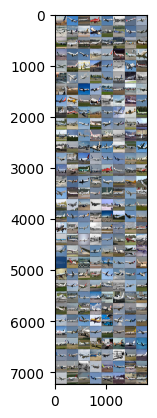

<generator object <genexpr> at 0x7f9ae496bdf0>


In [8]:
dataiter = iter(train_dataloader)
img, labels = next(dataiter)

imshow(torchvision.utils.make_grid(img))
print(" ".join(f'{classes[labels[j]]}') for j in range(batch_size))


In [9]:
img.shape

torch.Size([256, 3, 224, 224])

In [10]:

model = InceptionNet(num_classes= len(classes))

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [11]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,472
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5          [-1, 192, 56, 56]         110,784
       BatchNorm2d-6          [-1, 192, 56, 56]             384
              ReLU-7          [-1, 192, 56, 56]               0
         MaxPool2d-8          [-1, 192, 28, 28]               0
            Conv2d-9           [-1, 64, 28, 28]          12,352
      BatchNorm2d-10           [-1, 64, 28, 28]             128
             ReLU-11           [-1, 64, 28, 28]               0
           Conv2d-12           [-1, 96, 28, 28]          18,528
      BatchNorm2d-13           [-1, 96, 28, 28]             192
             ReLU-14           [-1, 96,

In [12]:
train(num_loops= 20, criterion= criterion, optim= optimizer, model= model, \
      train_dataloader= train_dataloader, device= device, path = "Inception_fgcvAircraft.pth")

  5%|▌         | 1/20 [00:28<08:57, 28.27s/it]

Epoch: 0 | Loss: 4.856336321149554


 10%|█         | 2/20 [00:57<08:39, 28.84s/it]

Epoch: 1 | Loss: 4.7956249713897705


 15%|█▌        | 3/20 [01:27<08:15, 29.16s/it]

Epoch: 2 | Loss: 4.719126769474575


 20%|██        | 4/20 [01:56<07:51, 29.45s/it]

Epoch: 3 | Loss: 4.677152122770037


 25%|██▌       | 5/20 [02:26<07:23, 29.58s/it]

Epoch: 4 | Loss: 4.632313387734549


 30%|███       | 6/20 [02:58<07:03, 30.29s/it]

Epoch: 5 | Loss: 4.631419897079468


 35%|███▌      | 7/20 [03:29<06:37, 30.54s/it]

Epoch: 6 | Loss: 4.552232980728149


 40%|████      | 8/20 [03:59<06:03, 30.28s/it]

Epoch: 7 | Loss: 4.51897897039141


 45%|████▌     | 9/20 [04:27<05:25, 29.60s/it]

Epoch: 8 | Loss: 4.532147680010114


 50%|█████     | 10/20 [04:56<04:53, 29.40s/it]

Epoch: 9 | Loss: 4.48353328023638


 55%|█████▌    | 11/20 [05:25<04:23, 29.25s/it]

Epoch: 10 | Loss: 4.497447865349906


 60%|██████    | 12/20 [05:56<04:00, 30.02s/it]

Epoch: 11 | Loss: 4.401833874838693


 65%|██████▌   | 13/20 [06:26<03:29, 29.96s/it]

Epoch: 12 | Loss: 4.425505263464792


 70%|███████   | 14/20 [06:55<02:58, 29.71s/it]

Epoch: 13 | Loss: 4.3766787733350485


 75%|███████▌  | 15/20 [07:24<02:26, 29.34s/it]

Epoch: 14 | Loss: 4.364610297339303


 80%|████████  | 16/20 [07:53<01:56, 29.15s/it]

Epoch: 15 | Loss: 4.251833643232073


 85%|████████▌ | 17/20 [08:21<01:26, 28.99s/it]

Epoch: 16 | Loss: 4.24339485168457


 90%|█████████ | 18/20 [08:51<00:58, 29.22s/it]

Epoch: 17 | Loss: 4.210884775434222


 95%|█████████▌| 19/20 [09:21<00:29, 29.46s/it]

Epoch: 18 | Loss: 4.163761104856219


100%|██████████| 20/20 [09:52<00:00, 29.61s/it]

Epoch: 19 | Loss: 4.14493009022304
Finished Training


Testing

In [17]:
model_pred = InceptionNet(num_classes= len(classes))
model_pred.load_state_dict(torch.load("Inception_fgcvAircraft.pth"))

<All keys matched successfully>

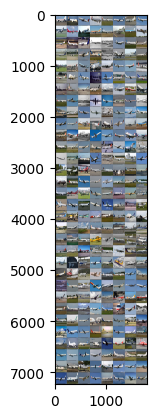

Ground truth:  757-200 737-500 A320 DC-3 A340-300 737-900 An-12 Gulfstream IV Tornado 757-200 Spitfire A300B4 L-1011 F-16A/B A330-300 Spitfire Tu-134 737-400 Fokker 50 DC-8 DC-8 Global Express E-195 Tu-154 767-300 A340-200 Il-76 A310 707-320 ERJ 135 737-800 CRJ-700 Spitfire CRJ-900 747-400 A340-600 C-130 ERJ 135 Gulfstream IV DHC-8-300 737-900 A300B4 Falcon 2000 A300B4 Dornier 328 MD-90 767-300 737-600 A340-200 ATR-42 DC-9-30 E-170 747-100 747-100 DHC-1 767-200 777-300 An-12 747-100 DHC-8-300 Tu-134 Beechcraft 1900 A340-600 C-47 Yak-42 Cessna 560 Metroliner Metroliner Fokker 50 A340-300 767-300 DC-10 747-200 CRJ-900 Cessna 208 Dornier 328 767-200 EMB-120 C-130 Saab 340 E-190 DC-3 C-47 MD-87 767-400 Gulfstream IV Fokker 70 DR-400 BAE-125 Gulfstream V 747-200 Il-76 A310 767-400 Boeing 717 BAE-125 747-100 Tu-134 737-800 767-200 L-1011 757-200 Cessna 172 BAE 146-300 Model B200 C-47 DH-82 Cessna 560 CRJ-700 Fokker 50 757-300 767-300 727-200 Saab 340 E-170 MD-87 An-12 737-700 Fokker 100 Yak-

In [15]:
dataiter = iter(test_dataloader)
img, labels = next(dataiter)
_, predicts = torch.max(model_pred(img), 1)


imshow(torchvision.utils.make_grid(img))
print("Ground truth: ", " ".join(f"{classes[labels[j]]}" for j in range(batch_size)))
print("Predict: ", " ".join(f"{classes[predicts[j]]}" for j in range(batch_size)))


In [18]:
test_classification(model= model_pred, test_dataloader= test_dataloader, \
                    device= device, classes= classes)
del model_pred

Accuracy of the network in the test dataset: 4 %
Accuracy for class 707-320: 3.0303030303030303
Accuracy for class 727-200: 0.0
Accuracy for class 737-200: 0.0
Accuracy for class 737-300: 0.0
Accuracy for class 737-400: 0.0
Accuracy for class 737-500: 0.0
Accuracy for class 737-600: 6.0606060606060606
Accuracy for class 737-700: 2.9411764705882355
Accuracy for class 737-800: 0.0
Accuracy for class 737-900: 0.0
Accuracy for class 747-100: 0.0
Accuracy for class 747-200: 0.0
Accuracy for class 747-300: 0.0
Accuracy for class 747-400: 0.0
Accuracy for class 757-200: 3.0303030303030303
Accuracy for class 757-300: 0.0
Accuracy for class 767-200: 2.9411764705882355
Accuracy for class 767-300: 0.0
Accuracy for class 767-400: 3.0303030303030303
Accuracy for class 777-200: 2.9411764705882355
Accuracy for class 777-300: 3.0303030303030303
Accuracy for class A300B4: 0.0
Accuracy for class A310: 0.0
Accuracy for class A318: 3.0303030303030303
Accuracy for class A319: 0.0
Accuracy for class A320: 0

In [19]:
import gc
# Collect garbage
gc.collect()

# Additionally, for CUDA, you can empty the cache to free unused memory
torch.cuda.empty_cache()

Loading from pretrained

In [20]:
len(classes)

100

In [21]:
models_pretrained = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)

    
models_pretrained.fc.out_features = len(classes)  # Get the number of input features of the first layer

# Check the modified model architecture
print(models_pretrained)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:01<00:00, 33.8MB/s]

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [22]:
import gc
# Collect garbage
gc.collect()

# Additionally, for CUDA, you can empty the cache to free unused memory
torch.cuda.empty_cache()

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(models_pretrained.parameters(), lr=0.001, momentum=0.9)

models_pretrained.to(device)

train(num_loops= 300, criterion= criterion, optim= optimizer, model= models_pretrained, \
      train_dataloader= train_dataloader, device= device, path = "Inception_fgcvAircraft.pth")


  0%|          | 1/300 [00:28<2:22:11, 28.53s/it]

Epoch: 0 | Loss: 7.641528129577637


  1%|          | 2/300 [00:57<2:23:55, 28.98s/it]

Epoch: 1 | Loss: 7.207947560719082


  1%|          | 3/300 [01:30<2:32:22, 30.78s/it]

Epoch: 2 | Loss: 6.598447050367083


  1%|▏         | 4/300 [02:03<2:36:15, 31.67s/it]

Epoch: 3 | Loss: 5.994058949606759


  2%|▏         | 5/300 [02:37<2:38:50, 32.31s/it]

Epoch: 4 | Loss: 5.413440431867327


  2%|▏         | 6/300 [03:09<2:38:58, 32.44s/it]

Epoch: 5 | Loss: 4.98367166519165


  2%|▏         | 7/300 [03:42<2:38:59, 32.56s/it]

Epoch: 6 | Loss: 4.670945814677647


  3%|▎         | 8/300 [04:16<2:39:54, 32.86s/it]

Epoch: 7 | Loss: 4.329098428998675


  3%|▎         | 9/300 [04:49<2:39:37, 32.91s/it]

Epoch: 8 | Loss: 4.049265418733869


  3%|▎         | 10/300 [05:22<2:39:51, 33.07s/it]

Epoch: 9 | Loss: 3.765797904559544


  4%|▎         | 11/300 [05:56<2:40:14, 33.27s/it]

Epoch: 10 | Loss: 3.509546552385603


  4%|▍         | 12/300 [06:28<2:38:37, 33.05s/it]

Epoch: 11 | Loss: 3.269113710948399


  4%|▍         | 13/300 [07:00<2:35:12, 32.45s/it]

Epoch: 12 | Loss: 3.062869463648115


  5%|▍         | 14/300 [07:31<2:33:01, 32.10s/it]

Epoch: 13 | Loss: 2.878696084022522


  5%|▌         | 15/300 [08:02<2:31:37, 31.92s/it]

Epoch: 14 | Loss: 2.6543408972876414


  5%|▌         | 16/300 [08:34<2:30:12, 31.73s/it]

Epoch: 15 | Loss: 2.4779947996139526


  6%|▌         | 17/300 [09:06<2:29:56, 31.79s/it]

Epoch: 16 | Loss: 2.300035459654672


  6%|▌         | 18/300 [09:37<2:29:11, 31.74s/it]

Epoch: 17 | Loss: 2.0831086465290616


  6%|▋         | 19/300 [10:08<2:27:45, 31.55s/it]

Epoch: 18 | Loss: 1.9517988647733415


  7%|▋         | 20/300 [10:41<2:28:12, 31.76s/it]

Epoch: 19 | Loss: 1.8339055521147591


  7%|▋         | 21/300 [11:12<2:27:15, 31.67s/it]

Epoch: 20 | Loss: 1.6956839731761388


  7%|▋         | 22/300 [11:41<2:23:15, 30.92s/it]

Epoch: 21 | Loss: 1.5314553124564034


  8%|▊         | 23/300 [12:12<2:22:18, 30.83s/it]

Epoch: 22 | Loss: 1.430856364113944


  8%|▊         | 24/300 [12:42<2:21:23, 30.74s/it]

Epoch: 23 | Loss: 1.3754823207855225


  8%|▊         | 25/300 [13:13<2:20:10, 30.58s/it]

Epoch: 24 | Loss: 1.2815785578319006


  9%|▊         | 26/300 [13:43<2:19:59, 30.65s/it]

Epoch: 25 | Loss: 1.1698330215045385


  9%|▉         | 27/300 [14:15<2:20:42, 30.92s/it]

Epoch: 26 | Loss: 1.0833095226969038


  9%|▉         | 28/300 [14:46<2:21:06, 31.13s/it]

Epoch: 27 | Loss: 1.0781106310231345


 10%|▉         | 29/300 [15:17<2:19:14, 30.83s/it]

Epoch: 28 | Loss: 0.9860155071531024


 10%|█         | 30/300 [15:47<2:17:58, 30.66s/it]

Epoch: 29 | Loss: 0.9710897547858102


 10%|█         | 31/300 [16:18<2:17:28, 30.66s/it]

Epoch: 30 | Loss: 0.8726233329091754


 11%|█         | 32/300 [16:49<2:18:20, 30.97s/it]

Epoch: 31 | Loss: 0.8248477493013654


 11%|█         | 33/300 [17:20<2:17:36, 30.92s/it]

Epoch: 32 | Loss: 0.8078197751726423


 11%|█▏        | 34/300 [17:53<2:19:29, 31.46s/it]

Epoch: 33 | Loss: 0.7408270835876465


 12%|█▏        | 35/300 [18:26<2:20:49, 31.89s/it]

Epoch: 34 | Loss: 0.7161986231803894


 12%|█▏        | 36/300 [18:58<2:20:21, 31.90s/it]

Epoch: 35 | Loss: 0.7357170283794403


 12%|█▏        | 37/300 [19:29<2:19:19, 31.78s/it]

Epoch: 36 | Loss: 0.7262551145894187


 13%|█▎        | 38/300 [20:01<2:18:48, 31.79s/it]

Epoch: 37 | Loss: 0.6397763916424343


 13%|█▎        | 39/300 [20:33<2:18:19, 31.80s/it]

Epoch: 38 | Loss: 0.6187171850885663


 13%|█▎        | 40/300 [21:02<2:13:56, 30.91s/it]

Epoch: 39 | Loss: 0.5606697584901538


 14%|█▎        | 41/300 [21:33<2:14:16, 31.11s/it]

Epoch: 40 | Loss: 0.5942847004958561


 14%|█▍        | 42/300 [22:06<2:15:52, 31.60s/it]

Epoch: 41 | Loss: 0.5175394351993289


 14%|█▍        | 43/300 [22:39<2:17:41, 32.15s/it]

Epoch: 42 | Loss: 0.47222939133644104


 15%|█▍        | 44/300 [23:12<2:17:20, 32.19s/it]

Epoch: 43 | Loss: 0.6049363783427647


 15%|█▌        | 45/300 [23:44<2:16:36, 32.14s/it]

Epoch: 44 | Loss: 0.49920144251414705


 15%|█▌        | 46/300 [24:15<2:14:57, 31.88s/it]

Epoch: 45 | Loss: 0.4395569860935211


 16%|█▌        | 47/300 [24:47<2:15:10, 32.06s/it]

Epoch: 46 | Loss: 0.45467776698725565


 16%|█▌        | 48/300 [25:19<2:14:29, 32.02s/it]

Epoch: 47 | Loss: 0.4833780143942152


 16%|█▋        | 49/300 [25:51<2:13:54, 32.01s/it]

Epoch: 48 | Loss: 0.46617493672030313


 17%|█▋        | 50/300 [26:23<2:13:20, 32.00s/it]

Epoch: 49 | Loss: 0.4210272878408432


 17%|█▋        | 51/300 [26:56<2:13:33, 32.18s/it]

Epoch: 50 | Loss: 0.3983897034611021


 17%|█▋        | 52/300 [27:29<2:14:01, 32.42s/it]

Epoch: 51 | Loss: 0.34906912062849316


 18%|█▊        | 53/300 [28:01<2:13:00, 32.31s/it]

Epoch: 52 | Loss: 0.3756523813520159


 18%|█▊        | 54/300 [28:33<2:11:37, 32.10s/it]

Epoch: 53 | Loss: 0.3558800018259457


 18%|█▊        | 55/300 [29:05<2:11:09, 32.12s/it]

Epoch: 54 | Loss: 0.36899599007197786


 19%|█▊        | 56/300 [29:37<2:11:01, 32.22s/it]

Epoch: 55 | Loss: 0.39633760494845255


 19%|█▉        | 57/300 [30:11<2:12:09, 32.63s/it]

Epoch: 56 | Loss: 0.39313494733401705


 19%|█▉        | 58/300 [30:44<2:12:38, 32.89s/it]

Epoch: 57 | Loss: 0.36096611831869396


 20%|█▉        | 59/300 [31:18<2:13:14, 33.17s/it]

Epoch: 58 | Loss: 0.31927913640226635


 20%|██        | 60/300 [31:50<2:10:47, 32.70s/it]

Epoch: 59 | Loss: 0.334046157343047


 20%|██        | 61/300 [32:19<2:06:23, 31.73s/it]

Epoch: 60 | Loss: 0.3514820379870279


 21%|██        | 62/300 [32:50<2:04:20, 31.34s/it]

Epoch: 61 | Loss: 0.28293502650090624


 21%|██        | 63/300 [33:22<2:05:11, 31.69s/it]

Epoch: 62 | Loss: 0.36545252799987793


 21%|██▏       | 64/300 [33:54<2:05:18, 31.86s/it]

Epoch: 63 | Loss: 0.3330827014786856


 22%|██▏       | 65/300 [34:28<2:06:43, 32.35s/it]

Epoch: 64 | Loss: 0.3038416653871536


 22%|██▏       | 66/300 [35:01<2:07:02, 32.58s/it]

Epoch: 65 | Loss: 0.3087042676551001


 22%|██▏       | 67/300 [35:35<2:07:59, 32.96s/it]

Epoch: 66 | Loss: 0.3023233711719513


 23%|██▎       | 68/300 [36:10<2:09:33, 33.51s/it]

Epoch: 67 | Loss: 0.32521546312740873


 23%|██▎       | 69/300 [36:44<2:09:58, 33.76s/it]

Epoch: 68 | Loss: 0.29153449301208767


 23%|██▎       | 70/300 [37:18<2:09:19, 33.74s/it]

Epoch: 69 | Loss: 0.31428504628794535


 24%|██▎       | 71/300 [37:50<2:07:38, 33.44s/it]

Epoch: 70 | Loss: 0.273230217397213


 24%|██▍       | 72/300 [38:24<2:07:18, 33.50s/it]

Epoch: 71 | Loss: 0.28846709962402073


 24%|██▍       | 73/300 [38:57<2:05:59, 33.30s/it]

Epoch: 72 | Loss: 0.3159672756280218


 25%|██▍       | 74/300 [39:29<2:04:43, 33.11s/it]

Epoch: 73 | Loss: 0.2775897490126746


 25%|██▌       | 75/300 [40:02<2:03:52, 33.03s/it]

Epoch: 74 | Loss: 0.23949463133301055


 25%|██▌       | 76/300 [40:35<2:02:29, 32.81s/it]

Epoch: 75 | Loss: 0.25680189047540936


 26%|██▌       | 77/300 [41:08<2:02:58, 33.09s/it]

Epoch: 76 | Loss: 0.21933954847710474


 26%|██▌       | 78/300 [41:42<2:02:53, 33.21s/it]

Epoch: 77 | Loss: 0.24592055167470658


 26%|██▋       | 79/300 [42:13<2:00:23, 32.68s/it]

Epoch: 78 | Loss: 0.23870660364627838


 27%|██▋       | 80/300 [42:47<2:00:55, 32.98s/it]

Epoch: 79 | Loss: 0.24936350647892272


 27%|██▋       | 81/300 [43:19<1:59:42, 32.80s/it]

Epoch: 80 | Loss: 0.22341362067631312


 27%|██▋       | 82/300 [43:51<1:58:19, 32.57s/it]

Epoch: 81 | Loss: 0.1866169199347496


 28%|██▊       | 83/300 [44:24<1:57:33, 32.51s/it]

Epoch: 82 | Loss: 0.2019986446414675


 28%|██▊       | 84/300 [44:56<1:56:35, 32.39s/it]

Epoch: 83 | Loss: 0.23011303480182374


 28%|██▊       | 85/300 [45:27<1:54:56, 32.07s/it]

Epoch: 84 | Loss: 0.2195658332535199


 29%|██▊       | 86/300 [46:00<1:55:11, 32.29s/it]

Epoch: 85 | Loss: 0.1841008152280535


 29%|██▉       | 87/300 [46:32<1:54:37, 32.29s/it]

Epoch: 86 | Loss: 0.19501129857131413


 29%|██▉       | 88/300 [47:05<1:54:41, 32.46s/it]

Epoch: 87 | Loss: 0.229394119232893


 30%|██▉       | 89/300 [47:38<1:54:04, 32.44s/it]

Epoch: 88 | Loss: 0.22436617740562984


 30%|███       | 90/300 [48:11<1:54:12, 32.63s/it]

Epoch: 89 | Loss: 0.24255468057734625


 30%|███       | 91/300 [48:44<1:54:36, 32.90s/it]

Epoch: 90 | Loss: 0.299655944108963


 31%|███       | 92/300 [49:18<1:54:47, 33.11s/it]

Epoch: 91 | Loss: 0.19383754581212997


 31%|███       | 93/300 [49:51<1:54:13, 33.11s/it]

Epoch: 92 | Loss: 0.28006234019994736


 31%|███▏      | 94/300 [50:24<1:53:46, 33.14s/it]

Epoch: 93 | Loss: 0.265337840787002


 32%|███▏      | 95/300 [50:57<1:53:03, 33.09s/it]

Epoch: 94 | Loss: 0.2592188460486276


 32%|███▏      | 96/300 [51:30<1:52:47, 33.18s/it]

Epoch: 95 | Loss: 0.22480695588248117


 32%|███▏      | 97/300 [52:03<1:52:08, 33.15s/it]

Epoch: 96 | Loss: 0.23245179227420262


 33%|███▎      | 98/300 [52:37<1:51:56, 33.25s/it]

Epoch: 97 | Loss: 0.22433136882526533


 33%|███▎      | 99/300 [53:11<1:51:52, 33.40s/it]

Epoch: 98 | Loss: 0.16542120490755355


 33%|███▎      | 100/300 [53:45<1:52:04, 33.62s/it]

Epoch: 99 | Loss: 0.1921646190541131


 34%|███▎      | 101/300 [54:18<1:51:00, 33.47s/it]

Epoch: 100 | Loss: 0.23548732112560952


 34%|███▍      | 102/300 [54:51<1:50:30, 33.49s/it]

Epoch: 101 | Loss: 0.2362007163465023


 34%|███▍      | 103/300 [55:25<1:50:19, 33.60s/it]

Epoch: 102 | Loss: 0.20833909990532057


 35%|███▍      | 104/300 [56:00<1:50:24, 33.80s/it]

Epoch: 103 | Loss: 0.1863581777683326


 35%|███▌      | 105/300 [56:34<1:49:56, 33.83s/it]

Epoch: 104 | Loss: 0.16160400903650693


 35%|███▌      | 106/300 [57:07<1:49:17, 33.80s/it]

Epoch: 105 | Loss: 0.17417056539228984


 36%|███▌      | 107/300 [57:40<1:48:10, 33.63s/it]

Epoch: 106 | Loss: 0.1689325746681009


 36%|███▌      | 108/300 [58:14<1:47:48, 33.69s/it]

Epoch: 107 | Loss: 0.17088827065059117


 36%|███▋      | 109/300 [58:49<1:48:03, 33.94s/it]

Epoch: 108 | Loss: 0.18322060629725456


 37%|███▋      | 110/300 [59:23<1:47:56, 34.09s/it]

Epoch: 109 | Loss: 0.17084638242210662


 37%|███▋      | 111/300 [59:57<1:46:41, 33.87s/it]

Epoch: 110 | Loss: 0.14509246019380434


 37%|███▋      | 112/300 [1:00:30<1:45:40, 33.73s/it]

Epoch: 111 | Loss: 0.1683300845324993


 38%|███▊      | 113/300 [1:01:04<1:45:43, 33.92s/it]

Epoch: 112 | Loss: 0.1420593410730362


 38%|███▊      | 114/300 [1:01:39<1:45:21, 33.98s/it]

Epoch: 113 | Loss: 0.15211310237646103


 38%|███▊      | 115/300 [1:02:13<1:44:46, 33.98s/it]

Epoch: 114 | Loss: 0.12946054499064172


 39%|███▊      | 116/300 [1:02:47<1:44:18, 34.01s/it]

Epoch: 115 | Loss: 0.2217672701392855


 39%|███▉      | 117/300 [1:03:20<1:42:52, 33.73s/it]

Epoch: 116 | Loss: 0.22813322767615318


 39%|███▉      | 118/300 [1:03:53<1:41:44, 33.54s/it]

Epoch: 117 | Loss: 0.21980181762150355


 40%|███▉      | 119/300 [1:04:27<1:41:32, 33.66s/it]

Epoch: 118 | Loss: 0.17505965381860733


 40%|████      | 120/300 [1:05:01<1:41:55, 33.97s/it]

Epoch: 119 | Loss: 0.17131856828927994


 40%|████      | 121/300 [1:05:36<1:41:58, 34.18s/it]

Epoch: 120 | Loss: 0.16204126179218292


 41%|████      | 122/300 [1:06:10<1:41:05, 34.08s/it]

Epoch: 121 | Loss: 0.14480010845831462


 41%|████      | 123/300 [1:06:44<1:40:09, 33.95s/it]

Epoch: 122 | Loss: 0.16464476021272795


 41%|████▏     | 124/300 [1:07:18<1:40:01, 34.10s/it]

Epoch: 123 | Loss: 0.18137236844216073


 42%|████▏     | 125/300 [1:07:51<1:38:21, 33.72s/it]

Epoch: 124 | Loss: 0.18731854536703654


 42%|████▏     | 126/300 [1:08:24<1:37:30, 33.62s/it]

Epoch: 125 | Loss: 0.13350629061460495


 42%|████▏     | 127/300 [1:08:58<1:36:50, 33.59s/it]

Epoch: 126 | Loss: 0.11369222828320094


 43%|████▎     | 128/300 [1:09:32<1:36:35, 33.69s/it]

Epoch: 127 | Loss: 0.12046326962964875


 43%|████▎     | 129/300 [1:10:06<1:36:15, 33.78s/it]

Epoch: 128 | Loss: 0.12450154072472028


 43%|████▎     | 130/300 [1:10:40<1:36:02, 33.90s/it]

Epoch: 129 | Loss: 0.12076685577630997


 44%|████▎     | 131/300 [1:11:13<1:34:55, 33.70s/it]

Epoch: 130 | Loss: 0.15542052792651312


 44%|████▍     | 132/300 [1:11:46<1:33:51, 33.52s/it]

Epoch: 131 | Loss: 0.14164199413997786


 44%|████▍     | 133/300 [1:12:20<1:33:12, 33.49s/it]

Epoch: 132 | Loss: 0.1006788398538317


 45%|████▍     | 134/300 [1:12:52<1:31:47, 33.18s/it]

Epoch: 133 | Loss: 0.1483329257794789


 45%|████▌     | 135/300 [1:13:25<1:31:24, 33.24s/it]

Epoch: 134 | Loss: 0.16462467451180732


 45%|████▌     | 136/300 [1:13:59<1:31:04, 33.32s/it]

Epoch: 135 | Loss: 0.11154975795320102


 46%|████▌     | 137/300 [1:14:33<1:31:20, 33.62s/it]

Epoch: 136 | Loss: 0.15116510806339128


 46%|████▌     | 138/300 [1:15:07<1:31:01, 33.71s/it]

Epoch: 137 | Loss: 0.1419368577854974


 46%|████▋     | 139/300 [1:15:41<1:30:43, 33.81s/it]

Epoch: 138 | Loss: 0.20746636071375438


 47%|████▋     | 140/300 [1:16:15<1:29:56, 33.73s/it]

Epoch: 139 | Loss: 0.12580377821411406


 47%|████▋     | 141/300 [1:16:49<1:29:59, 33.96s/it]

Epoch: 140 | Loss: 0.11817237521920886


 47%|████▋     | 142/300 [1:17:23<1:29:12, 33.88s/it]

Epoch: 141 | Loss: 0.10684707973684583


 48%|████▊     | 143/300 [1:17:57<1:28:46, 33.93s/it]

Epoch: 142 | Loss: 0.09001262060233525


 48%|████▊     | 144/300 [1:18:31<1:28:05, 33.88s/it]

Epoch: 143 | Loss: 0.09841567277908325


 48%|████▊     | 145/300 [1:19:05<1:27:53, 34.02s/it]

Epoch: 144 | Loss: 0.11465213181717056


 49%|████▊     | 146/300 [1:19:39<1:27:16, 34.00s/it]

Epoch: 145 | Loss: 0.09329732401030404


 49%|████▉     | 147/300 [1:20:13<1:26:44, 34.02s/it]

Epoch: 146 | Loss: 0.1143864451774529


 49%|████▉     | 148/300 [1:20:47<1:26:10, 34.02s/it]

Epoch: 147 | Loss: 0.10025465195732457


 50%|████▉     | 149/300 [1:21:21<1:25:18, 33.90s/it]

Epoch: 148 | Loss: 0.12165368295141629


 50%|█████     | 150/300 [1:21:55<1:25:16, 34.11s/it]

Epoch: 149 | Loss: 0.12405656331351825


 50%|█████     | 151/300 [1:22:29<1:24:41, 34.10s/it]

Epoch: 150 | Loss: 0.1077799243586404


 51%|█████     | 152/300 [1:23:04<1:24:38, 34.31s/it]

Epoch: 151 | Loss: 0.11826045412038054


 51%|█████     | 153/300 [1:23:38<1:23:26, 34.06s/it]

Epoch: 152 | Loss: 0.1299762630036899


 51%|█████▏    | 154/300 [1:24:12<1:22:51, 34.05s/it]

Epoch: 153 | Loss: 0.13637811477695191


 52%|█████▏    | 155/300 [1:24:46<1:22:35, 34.18s/it]

Epoch: 154 | Loss: 0.11626059695013932


 52%|█████▏    | 156/300 [1:25:21<1:22:34, 34.41s/it]

Epoch: 155 | Loss: 0.2124917922275407


 52%|█████▏    | 157/300 [1:25:55<1:21:21, 34.14s/it]

Epoch: 156 | Loss: 0.09636051367436137


 53%|█████▎    | 158/300 [1:26:29<1:20:42, 34.10s/it]

Epoch: 157 | Loss: 0.10714172305805343


 53%|█████▎    | 159/300 [1:27:03<1:19:58, 34.03s/it]

Epoch: 158 | Loss: 0.1509275162326438


 53%|█████▎    | 160/300 [1:27:36<1:19:15, 33.97s/it]

Epoch: 159 | Loss: 0.10328915582171508


 54%|█████▎    | 161/300 [1:28:10<1:18:08, 33.73s/it]

Epoch: 160 | Loss: 0.13282717445066997


 54%|█████▍    | 162/300 [1:28:44<1:17:45, 33.80s/it]

Epoch: 161 | Loss: 0.09470116506729807


 54%|█████▍    | 163/300 [1:29:18<1:17:21, 33.88s/it]

Epoch: 162 | Loss: 0.18735479510256223


 55%|█████▍    | 164/300 [1:29:51<1:16:33, 33.78s/it]

Epoch: 163 | Loss: 0.12560745355273997


 55%|█████▌    | 165/300 [1:30:25<1:15:51, 33.72s/it]

Epoch: 164 | Loss: 0.13915008279894078


 55%|█████▌    | 166/300 [1:31:00<1:16:06, 34.08s/it]

Epoch: 165 | Loss: 0.09950633879218783


 56%|█████▌    | 167/300 [1:31:34<1:15:30, 34.06s/it]

Epoch: 166 | Loss: 0.11134039450969015


 56%|█████▌    | 168/300 [1:32:07<1:14:31, 33.88s/it]

Epoch: 167 | Loss: 0.09166539433811392


 56%|█████▋    | 169/300 [1:32:41<1:13:54, 33.85s/it]

Epoch: 168 | Loss: 0.11964807765824455


 57%|█████▋    | 170/300 [1:33:15<1:13:40, 34.00s/it]

Epoch: 169 | Loss: 0.0667626296303102


 57%|█████▋    | 171/300 [1:33:49<1:12:59, 33.95s/it]

Epoch: 170 | Loss: 0.10503355945859637


 57%|█████▋    | 172/300 [1:34:23<1:12:14, 33.87s/it]

Epoch: 171 | Loss: 0.07485955261758395


 58%|█████▊    | 173/300 [1:34:56<1:11:20, 33.71s/it]

Epoch: 172 | Loss: 0.07566642495138305


 58%|█████▊    | 174/300 [1:35:30<1:10:53, 33.76s/it]

Epoch: 173 | Loss: 0.1167665326169559


 58%|█████▊    | 175/300 [1:36:04<1:10:24, 33.80s/it]

Epoch: 174 | Loss: 0.10476408845611981


 59%|█████▊    | 176/300 [1:36:37<1:09:44, 33.75s/it]

Epoch: 175 | Loss: 0.09451532629983765


 59%|█████▉    | 177/300 [1:37:11<1:09:15, 33.78s/it]

Epoch: 176 | Loss: 0.08092633714633328


 59%|█████▉    | 178/300 [1:37:45<1:08:22, 33.63s/it]

Epoch: 177 | Loss: 0.07354858810348171


 60%|█████▉    | 179/300 [1:38:18<1:07:55, 33.68s/it]

Epoch: 178 | Loss: 0.10781840847006866


 60%|██████    | 180/300 [1:38:52<1:07:04, 33.54s/it]

Epoch: 179 | Loss: 0.1576626958059413


 60%|██████    | 181/300 [1:39:25<1:06:30, 33.53s/it]

Epoch: 180 | Loss: 0.1333627916340317


 61%|██████    | 182/300 [1:39:59<1:05:52, 33.50s/it]

Epoch: 181 | Loss: 0.11355506336050374


 61%|██████    | 183/300 [1:40:33<1:05:46, 33.73s/it]

Epoch: 182 | Loss: 0.18744274228811264


 61%|██████▏   | 184/300 [1:41:07<1:05:18, 33.78s/it]

Epoch: 183 | Loss: 0.15718930321080343


 62%|██████▏   | 185/300 [1:41:41<1:05:12, 34.03s/it]

Epoch: 184 | Loss: 0.12953600447092736


 62%|██████▏   | 186/300 [1:42:15<1:04:34, 33.99s/it]

Epoch: 185 | Loss: 0.09617901327354568


 62%|██████▏   | 187/300 [1:42:49<1:03:58, 33.97s/it]

Epoch: 186 | Loss: 0.11128442574824605


 63%|██████▎   | 188/300 [1:43:23<1:03:22, 33.95s/it]

Epoch: 187 | Loss: 0.13643474823662213


 63%|██████▎   | 189/300 [1:43:58<1:03:12, 34.17s/it]

Epoch: 188 | Loss: 0.15400079478110587


 63%|██████▎   | 190/300 [1:44:32<1:02:35, 34.14s/it]

Epoch: 189 | Loss: 0.11629282443651132


 64%|██████▎   | 191/300 [1:45:07<1:02:21, 34.32s/it]

Epoch: 190 | Loss: 0.172259942229305


 64%|██████▍   | 192/300 [1:45:41<1:01:50, 34.36s/it]

Epoch: 191 | Loss: 0.11823293194174767


 64%|██████▍   | 193/300 [1:46:15<1:01:14, 34.34s/it]

Epoch: 192 | Loss: 0.13502456114760467


 65%|██████▍   | 194/300 [1:46:49<1:00:25, 34.20s/it]

Epoch: 193 | Loss: 0.12104574936841216


 65%|██████▌   | 195/300 [1:47:23<59:49, 34.19s/it]  

Epoch: 194 | Loss: 0.10829235719782966


 65%|██████▌   | 196/300 [1:47:57<59:05, 34.09s/it]

Epoch: 195 | Loss: 0.09044367208012513


 66%|██████▌   | 197/300 [1:48:31<58:27, 34.05s/it]

Epoch: 196 | Loss: 0.11412286678595203


 66%|██████▌   | 198/300 [1:49:05<57:57, 34.09s/it]

Epoch: 197 | Loss: 0.09965525328048638


 66%|██████▋   | 199/300 [1:49:39<57:19, 34.05s/it]

Epoch: 198 | Loss: 0.08425151237419673


 67%|██████▋   | 200/300 [1:50:13<56:32, 33.93s/it]

Epoch: 199 | Loss: 0.09716068101780755


 67%|██████▋   | 201/300 [1:50:47<55:49, 33.83s/it]

Epoch: 200 | Loss: 0.08890782695795808


 67%|██████▋   | 202/300 [1:51:20<55:01, 33.69s/it]

Epoch: 201 | Loss: 0.06625938309090477


 68%|██████▊   | 203/300 [1:51:54<54:29, 33.71s/it]

Epoch: 202 | Loss: 0.08115113925720964


 68%|██████▊   | 204/300 [1:52:27<53:46, 33.61s/it]

Epoch: 203 | Loss: 0.08205062816185611


 68%|██████▊   | 205/300 [1:53:01<53:17, 33.66s/it]

Epoch: 204 | Loss: 0.07517003081738949


 69%|██████▊   | 206/300 [1:53:34<52:33, 33.55s/it]

Epoch: 205 | Loss: 0.1404078472405672


 69%|██████▉   | 207/300 [1:54:09<52:36, 33.94s/it]

Epoch: 206 | Loss: 0.10137167067400046


 69%|██████▉   | 208/300 [1:54:43<52:15, 34.08s/it]

Epoch: 207 | Loss: 0.10300160917852606


 70%|██████▉   | 209/300 [1:55:18<51:43, 34.11s/it]

Epoch: 208 | Loss: 0.08299747136022363


 70%|███████   | 210/300 [1:55:51<50:55, 33.95s/it]

Epoch: 209 | Loss: 0.0942558329552412


 70%|███████   | 211/300 [1:56:24<50:05, 33.77s/it]

Epoch: 210 | Loss: 0.08766687395317214


 71%|███████   | 212/300 [1:56:58<49:37, 33.84s/it]

Epoch: 211 | Loss: 0.07762053954814162


 71%|███████   | 213/300 [1:57:33<49:13, 33.95s/it]

Epoch: 212 | Loss: 0.07913523779383727


 71%|███████▏  | 214/300 [1:58:07<48:39, 33.94s/it]

Epoch: 213 | Loss: 0.0932416349117245


 72%|███████▏  | 215/300 [1:58:40<47:49, 33.76s/it]

Epoch: 214 | Loss: 0.08037040116531509


 72%|███████▏  | 216/300 [1:59:13<47:07, 33.67s/it]

Epoch: 215 | Loss: 0.05868212213473661


 72%|███████▏  | 217/300 [1:59:48<46:50, 33.86s/it]

Epoch: 216 | Loss: 0.09361080160098416


 73%|███████▎  | 218/300 [2:00:22<46:27, 33.99s/it]

Epoch: 217 | Loss: 0.13333552623433725


 73%|███████▎  | 219/300 [2:00:56<45:47, 33.91s/it]

Epoch: 218 | Loss: 0.08332431848560061


 73%|███████▎  | 220/300 [2:01:29<45:05, 33.82s/it]

Epoch: 219 | Loss: 0.11045594327151775


 74%|███████▎  | 221/300 [2:02:03<44:18, 33.65s/it]

Epoch: 220 | Loss: 0.132055562255638


 74%|███████▍  | 222/300 [2:02:37<43:57, 33.81s/it]

Epoch: 221 | Loss: 0.12585949205926486


 74%|███████▍  | 223/300 [2:03:10<43:10, 33.65s/it]

Epoch: 222 | Loss: 0.10290632716247014


 75%|███████▍  | 224/300 [2:03:44<42:36, 33.64s/it]

Epoch: 223 | Loss: 0.1149346184517656


 75%|███████▌  | 225/300 [2:04:17<41:59, 33.59s/it]

Epoch: 224 | Loss: 0.09186571942908424


 75%|███████▌  | 226/300 [2:04:50<41:05, 33.32s/it]

Epoch: 225 | Loss: 0.07171736391527313


 76%|███████▌  | 227/300 [2:05:22<40:10, 33.02s/it]

Epoch: 226 | Loss: 0.05867986647146089


 76%|███████▌  | 228/300 [2:05:56<39:52, 33.22s/it]

Epoch: 227 | Loss: 0.06657356077006885


 76%|███████▋  | 229/300 [2:06:29<39:27, 33.35s/it]

Epoch: 228 | Loss: 0.06718680475439344


 77%|███████▋  | 230/300 [2:07:03<38:56, 33.38s/it]

Epoch: 229 | Loss: 0.061294465857957094


 77%|███████▋  | 231/300 [2:07:36<38:10, 33.20s/it]

Epoch: 230 | Loss: 0.07941849290260247


 77%|███████▋  | 232/300 [2:08:09<37:46, 33.32s/it]

Epoch: 231 | Loss: 0.049603156612387726


 78%|███████▊  | 233/300 [2:08:43<37:29, 33.57s/it]

Epoch: 232 | Loss: 0.12164994834789208


 78%|███████▊  | 234/300 [2:09:18<37:15, 33.86s/it]

Epoch: 233 | Loss: 0.12625124571578844


 78%|███████▊  | 235/300 [2:09:52<36:34, 33.77s/it]

Epoch: 234 | Loss: 0.21019650303891727


 79%|███████▊  | 236/300 [2:10:25<35:57, 33.72s/it]

Epoch: 235 | Loss: 0.13298226467200688


 79%|███████▉  | 237/300 [2:10:59<35:29, 33.80s/it]

Epoch: 236 | Loss: 0.11471848376095295


 79%|███████▉  | 238/300 [2:11:33<35:03, 33.93s/it]

Epoch: 237 | Loss: 0.11298563703894615


 80%|███████▉  | 239/300 [2:12:08<34:36, 34.04s/it]

Epoch: 238 | Loss: 0.11071429481463772


 80%|████████  | 240/300 [2:12:41<33:53, 33.88s/it]

Epoch: 239 | Loss: 0.11319687962532043


 80%|████████  | 241/300 [2:13:15<33:15, 33.81s/it]

Epoch: 240 | Loss: 0.09394590184092522


 81%|████████  | 242/300 [2:13:48<32:34, 33.70s/it]

Epoch: 241 | Loss: 0.07194810280842441


 81%|████████  | 243/300 [2:14:23<32:18, 34.00s/it]

Epoch: 242 | Loss: 0.10504967240350586


 81%|████████▏ | 244/300 [2:14:57<31:49, 34.09s/it]

Epoch: 243 | Loss: 0.09778097830712795


 82%|████████▏ | 245/300 [2:15:31<31:02, 33.86s/it]

Epoch: 244 | Loss: 0.08238460948424679


 82%|████████▏ | 246/300 [2:16:04<30:15, 33.61s/it]

Epoch: 245 | Loss: 0.17835528829268046


 82%|████████▏ | 247/300 [2:16:36<29:23, 33.27s/it]

Epoch: 246 | Loss: 0.07991461455821991


 83%|████████▎ | 248/300 [2:17:09<28:48, 33.25s/it]

Epoch: 247 | Loss: 0.07593769526907376


 83%|████████▎ | 249/300 [2:17:42<28:07, 33.09s/it]

Epoch: 248 | Loss: 0.0676501217697348


 83%|████████▎ | 250/300 [2:18:16<27:42, 33.25s/it]

Epoch: 249 | Loss: 0.08418830883290086


 84%|████████▎ | 251/300 [2:18:49<27:16, 33.41s/it]

Epoch: 250 | Loss: 0.10486659647098609


 84%|████████▍ | 252/300 [2:19:23<26:38, 33.30s/it]

Epoch: 251 | Loss: 0.12746005984289305


 84%|████████▍ | 253/300 [2:19:57<26:16, 33.55s/it]

Epoch: 252 | Loss: 0.09491741737084729


 85%|████████▍ | 254/300 [2:20:31<25:50, 33.70s/it]

Epoch: 253 | Loss: 0.1743985494332654


 85%|████████▌ | 255/300 [2:21:04<25:13, 33.64s/it]

Epoch: 254 | Loss: 0.1135377889232976


 85%|████████▌ | 256/300 [2:21:38<24:37, 33.57s/it]

Epoch: 255 | Loss: 0.1012093648314476


 86%|████████▌ | 257/300 [2:22:11<23:55, 33.38s/it]

Epoch: 256 | Loss: 0.0781548973172903


 86%|████████▌ | 258/300 [2:22:45<23:40, 33.82s/it]

Epoch: 257 | Loss: 0.054048488448773115


 86%|████████▋ | 259/300 [2:23:20<23:12, 33.95s/it]

Epoch: 258 | Loss: 0.09344141877123288


 87%|████████▋ | 260/300 [2:23:53<22:33, 33.83s/it]

Epoch: 259 | Loss: 0.10366642102599144


 87%|████████▋ | 261/300 [2:24:26<21:48, 33.56s/it]

Epoch: 260 | Loss: 0.11083910561033658


 87%|████████▋ | 262/300 [2:25:00<21:19, 33.67s/it]

Epoch: 261 | Loss: 0.11086252970354897


 88%|████████▊ | 263/300 [2:25:32<20:30, 33.27s/it]

Epoch: 262 | Loss: 0.09491701583777155


 88%|████████▊ | 264/300 [2:26:05<19:51, 33.10s/it]

Epoch: 263 | Loss: 0.10547978989779949


 88%|████████▊ | 265/300 [2:26:38<19:21, 33.19s/it]

Epoch: 264 | Loss: 0.08281348619077887


 89%|████████▊ | 266/300 [2:27:12<18:48, 33.18s/it]

Epoch: 265 | Loss: 0.1140365581959486


 89%|████████▉ | 267/300 [2:27:45<18:18, 33.28s/it]

Epoch: 266 | Loss: 0.12432472088507243


 89%|████████▉ | 268/300 [2:28:19<17:49, 33.41s/it]

Epoch: 267 | Loss: 0.08417013606854848


 90%|████████▉ | 269/300 [2:28:51<17:05, 33.07s/it]

Epoch: 268 | Loss: 0.06309325114956923


 90%|█████████ | 270/300 [2:29:24<16:29, 32.99s/it]

Epoch: 269 | Loss: 0.12424833460577897


 90%|█████████ | 271/300 [2:29:58<16:04, 33.25s/it]

Epoch: 270 | Loss: 0.08163370564579964


 91%|█████████ | 272/300 [2:30:30<15:23, 32.98s/it]

Epoch: 271 | Loss: 0.09317208001656192


 91%|█████████ | 273/300 [2:31:02<14:41, 32.66s/it]

Epoch: 272 | Loss: 0.08497929546449866


 91%|█████████▏| 274/300 [2:31:34<14:01, 32.37s/it]

Epoch: 273 | Loss: 0.09045460021921567


 92%|█████████▏| 275/300 [2:32:07<13:34, 32.60s/it]

Epoch: 274 | Loss: 0.11011697059231144


 92%|█████████▏| 276/300 [2:32:39<12:57, 32.40s/it]

Epoch: 275 | Loss: 0.06920507709894862


 92%|█████████▏| 277/300 [2:33:11<12:21, 32.22s/it]

Epoch: 276 | Loss: 0.07874644521091666


 93%|█████████▎| 278/300 [2:33:43<11:49, 32.24s/it]

Epoch: 277 | Loss: 0.08522402601582664


 93%|█████████▎| 279/300 [2:34:15<11:16, 32.23s/it]

Epoch: 278 | Loss: 0.06044673254447324


 93%|█████████▎| 280/300 [2:34:48<10:45, 32.29s/it]

Epoch: 279 | Loss: 0.08065152633935213


 94%|█████████▎| 281/300 [2:35:20<10:13, 32.28s/it]

Epoch: 280 | Loss: 0.09087025573743242


 94%|█████████▍| 282/300 [2:35:52<09:39, 32.21s/it]

Epoch: 281 | Loss: 0.05255130039794104


 94%|█████████▍| 283/300 [2:36:23<09:04, 32.00s/it]

Epoch: 282 | Loss: 0.049310028952147276


 95%|█████████▍| 284/300 [2:36:56<08:34, 32.14s/it]

Epoch: 283 | Loss: 0.0392745669398989


 95%|█████████▌| 285/300 [2:37:28<08:03, 32.21s/it]

Epoch: 284 | Loss: 0.05017176882496902


 95%|█████████▌| 286/300 [2:38:00<07:30, 32.15s/it]

Epoch: 285 | Loss: 0.04910758111093726


 96%|█████████▌| 287/300 [2:38:34<07:03, 32.57s/it]

Epoch: 286 | Loss: 0.07761897692190749


 96%|█████████▌| 288/300 [2:39:06<06:30, 32.51s/it]

Epoch: 287 | Loss: 0.039581136644950936


 96%|█████████▋| 289/300 [2:39:39<05:58, 32.62s/it]

Epoch: 288 | Loss: 0.10284898030970778


 97%|█████████▋| 290/300 [2:40:12<05:26, 32.61s/it]

Epoch: 289 | Loss: 0.07671194363917623


 97%|█████████▋| 291/300 [2:40:44<04:52, 32.45s/it]

Epoch: 290 | Loss: 0.09828766368861709


 97%|█████████▋| 292/300 [2:41:16<04:19, 32.45s/it]

Epoch: 291 | Loss: 0.06975542860371726


 98%|█████████▊| 293/300 [2:41:48<03:45, 32.15s/it]

Epoch: 292 | Loss: 0.049743601121008396


 98%|█████████▊| 294/300 [2:42:19<03:11, 31.88s/it]

Epoch: 293 | Loss: 0.06287949492356606


 98%|█████████▊| 295/300 [2:42:51<02:40, 32.02s/it]

Epoch: 294 | Loss: 0.037640138396195004


 99%|█████████▊| 296/300 [2:43:23<02:08, 32.06s/it]

Epoch: 295 | Loss: 0.07366809381970338


 99%|█████████▉| 297/300 [2:43:56<01:36, 32.31s/it]

Epoch: 296 | Loss: 0.06431532930582762


 99%|█████████▉| 298/300 [2:44:30<01:05, 32.63s/it]

Epoch: 297 | Loss: 0.049115513052259176


100%|█████████▉| 299/300 [2:45:02<00:32, 32.54s/it]

Epoch: 298 | Loss: 0.04581788834184408


100%|██████████| 300/300 [2:45:35<00:00, 33.12s/it]

Epoch: 299 | Loss: 0.06880588616643633
Finished Training


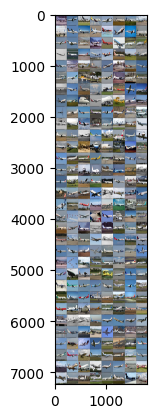

Ground truth:  Beechcraft 1900 DC-9-30 Tornado 737-200 Fokker 50 A340-600 737-900 Eurofighter Typhoon 767-400 ATR-42 L-1011 L-1011 DHC-6 737-200 F/A-18 A340-600 A340-300 BAE-125 Beechcraft 1900 Beechcraft 1900 737-700 Fokker 100 Fokker 100 ATR-72 747-100 CRJ-200 Tu-134 DC-9-30 Tu-154 BAE 146-300 C-47 E-190 777-200 737-300 PA-28 ATR-42 767-400 Metroliner A340-600 ERJ 145 Boeing 717 Fokker 70 DR-400 DHC-1 A380 C-130 CRJ-700 757-300 DC-8 757-300 Fokker 70 737-400 PA-28 CRJ-900 SR-20 747-100 737-700 A330-200 BAE 146-200 A330-200 747-100 DH-82 Il-76 ERJ 135 F/A-18 Fokker 50 MD-87 737-900 Saab 2000 737-300 DHC-8-100 A300B4 DC-3 C-47 A310 DR-400 737-300 F/A-18 E-195 Yak-42 Il-76 Gulfstream V C-47 DHC-8-300 F/A-18 737-600 747-200 Challenger 600 Model B200 PA-28 Hawk T1 CRJ-700 Global Express CRJ-200 767-200 DC-9-30 A340-500 BAE-125 777-300 737-200 A340-600 A320 757-200 F-16A/B 757-300 Challenger 600 L-1011 747-300 Metroliner Beechcraft 1900 MD-87 C-47 DHC-8-300 Spitfire Global Express BAE 146-

In [24]:
model_pred = models_pretrained
#model_pred.load_state_dict(torch.load("Inception_fgcvAircraft.pth"))
#del models_pretrained
dataiter = iter(test_dataloader)
img, labels = next(dataiter)
model_pred.to('cpu')
_, predicts = torch.max(model_pred(img), 1)


imshow(torchvision.utils.make_grid(img))
print("Ground truth: ", " ".join(f"{classes[labels[j]]}" for j in range(batch_size)))
print("Predict: ", " ".join(f"{classes[predicts[j]]}" for j in range(batch_size)))


In [25]:
model_pred.to(device)
test_classification(model= model_pred, test_dataloader= test_dataloader, \
                    device= device, classes= classes)
del model_pred

Accuracy of the network in the test dataset: 38 %
Accuracy for class 707-320: 9.090909090909092
Accuracy for class 727-200: 17.647058823529413
Accuracy for class 737-200: 24.242424242424242
Accuracy for class 737-300: 9.090909090909092
Accuracy for class 737-400: 17.647058823529413
Accuracy for class 737-500: 18.181818181818183
Accuracy for class 737-600: 30.303030303030305
Accuracy for class 737-700: 23.529411764705884
Accuracy for class 737-800: 39.39393939393939
Accuracy for class 737-900: 48.484848484848484
Accuracy for class 747-100: 23.529411764705884
Accuracy for class 747-200: 12.121212121212121
Accuracy for class 747-300: 39.39393939393939
Accuracy for class 747-400: 23.529411764705884
Accuracy for class 757-200: 21.21212121212121
Accuracy for class 757-300: 24.242424242424242
Accuracy for class 767-200: 32.35294117647059
Accuracy for class 767-300: 12.121212121212121
Accuracy for class 767-400: 57.57575757575758
Accuracy for class 777-200: 20.58823529411765
Accuracy for class

In [26]:
import gc
# Collect garbage
gc.collect()

# Additionally, for CUDA, you can empty the cache to free unused memory
torch.cuda.empty_cache()

In [ ]:
del test_dataloader

In [ ]:
del model_pretrained